# How to use TensorFlow

### What is Tensorflow?

In [1]:
from IPython.display import Image
from IPython.core.display import display, HTML
Image(url= "https://i.imgur.com/l8xexM0.png")

Tensorflow is a flexible, open-source interface for expressing machine learning algorithms. TensorFlow was developed by Google as a more efficient way to create and use deep learning for research and development.  It is a library that was built with neural networking in mind, making it a great tool for deep learning.  TensorFlow is a scalable software library, working on a laptop and in massive production environments.  TensorFlow has several APIs that allow it to work with Python, R, C++, and others.  It is also highly configurable, able to run on multiple CPUs and GPUs.  TensorFlow also comes with a logging interface called “Tensorboard,” which allows the user to examine the model in a web interface.

### More on the history

In [2]:
Image(url= "https://i.imgur.com/KvZ88ZP.jpg", width=300, height=225)

Tensorflow was initially developed by the Google Brain team for use on internal projects. Tensorflow is actually the second generation of DistBelief, a proprietary ML system based on deep learning neural nets that was created in 2011. Distbelief was used for research and application like speech recognition. Tensorflow was released as a more robust version on a Apache 2.0 open source license in 2015.

### How does it work?

To understand Tensorflow, we need to understand “tensors.”  Tensors can be described as a multidimensional array (n-dimensional structures).  Tensors represent whatever we define them as, such as the pixels of an image, and can be altered as it “flows” between operations, which is where we get the name “TensorFlow.”

In [3]:
Image(url= "https://i.imgur.com/nSrJKcp.png?1")

### What can we use it for?

Tensorflow is mainly used for neural networks and is a very powerful tool for image recognition and audio recognition.  In the example below, we will walk through how to build a neural network in Tensorflow that can identify handwritten numbers.

In [4]:
Image(url= "https://i.imgur.com/7pvfFHC.png")

# Building a Neural Net in TensorFlow

In building this neural network, we are going to use a package called "Keras."  This will allow for more complex deep learning in less code while maintaining an easy to follow structure.  I'm also going to use a GPU rather than a CPU in this model as an example. Using a GPU is much faster than processing with a CPU for this type of analysis. More information on how to set this up can be found in the TensorFlow documentation: https://www.tensorflow.org/install/install_windows

In [5]:
#Supressing warnings to save space
import warnings
warnings.filterwarnings('ignore')

In [6]:
#This verifies that the GPU is recognized and used by Tensorflow
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


The dataset we are going to be working with is called "MNIST", a dataset of handwritten numerical digits.  The images are 28 x 28 pixels, and are in grayscale, meaning there is one channel.  Shown below are some samples of these images.

In [7]:
Image(url= "https://i.imgur.com/uWjw86G.png", width=400, height=400)

The point of this model is predict and identify each digit correctly. The Neural Net that is going to be created is called a convolutional neural network (CNN), which consists of a convolutional layer, a pooling layer, and a fully connected layer.  CNNs are useful in image recognition because they allow for deep learning without needing a high number of neurons.

Lets start by loading in the packages.  As you can see, we are loading in TensorFlow, Keras, as well as numpy and sklearn.

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import TensorBoard
from keras import backend as K

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

Using TensorFlow backend.


In [9]:
# Create input object which reads data from MNIST datasets.  Perform one-hot encoding to define the digit
def load_data(img_dir):
    return np.array([cv2.imread(os.path.join(img_dir, img)).flatten() for img in os.listdir(img_dir) if img.endswith(".jpg")])

Here we will load in the dataset as "mnist".

In [10]:
mnist = input_data.read_data_sets("D:/Google Drive/Corey - School/!Spring 2018 B/BIA 6303 - Predictive Models/HW_Final_Project/data/MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:/Google Drive/Corey - School/!Spring 2018 B/BIA 6303 - Predictive Models/HW_Final_Project/data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:/Google Drive/Corey - School/!Spring 2018 B/BIA 6303 - Predictive Models/HW_Final_Project/data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:/Google Drive/Corey - School/!Spring 2018 B/BIA 6303 - Predictive Models/HW_Final_Project/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting D:/Google Drive/Corey - School/!Spring 2018 B/BIA 6303 - Predictive Models/HW_Final_Project/data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updat

We will start the session here:

In [11]:
sess = tf.InteractiveSession()

Defining the size of the image this way prevents any accidents in coding the model down the road.  Since we know the the image is 28 by 28, both the row and column will be 28.

In [12]:
image_rows = 28
image_cols = 28

Here we start defining the shape to the image tensor.  The 28 is the height and weight, which adding the 1 implies the number of color channels.  Since we are only using grayscale, this is 1.

In [13]:
# reshape the training and test images to 28 X 28 X 1 
train_images = mnist.train.images.reshape(mnist.train.images.shape[0],image_rows, image_cols, 1)
test_images =  mnist.test.images.reshape(mnist.test.images.shape[0], image_rows, image_cols, 1)

Lets take a look at the images, just to make sure they are showing up correctly.

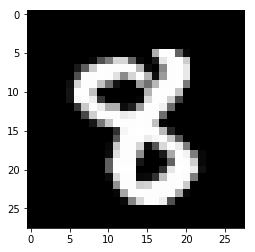

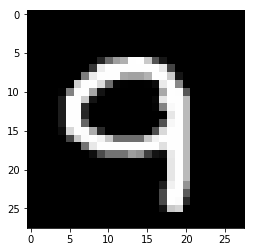

In [14]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(2)
gen_image(batch_xs[0]).show()
gen_image(batch_xs[1]).show()

We define the values for our layers.  Again, defining them like this prevents any confusing errors due to typos. This is also very handy when the layers tend to have the same specifications.

In [15]:
# Layer values
num_filters = 32                # Number of conv filters
max_pool_size = (2, 2)          # shape of MaxPool
conv_kernel_size = (3, 3)       # conv kernel shape
imag_shape = (28,28,1)          # the shape of the image as was described before
num_classes = 10                # The number different possible predictions (0-9)
drop_prob = 0.5                 # fraction to drop (0-1.0)

Now we start defining our model!  The Sequential model type is just like it sounds, it is a sequential list of layers.

In [16]:
# Define the model type
model = Sequential()

Next, we define each layer.  Here, we will have 2 convolutional layers, 2 pooling layers, and a fully connected layer.  The convolutional layer will divide each image up and measure the color scale, as shown below.

In [17]:
Image(url= "https://i.imgur.com/0z2N9q6.png", width=400, height=400)
#Credit to pluralsight for the image

The pooling layer reduces the size of the grid by keeping the average of the sections, as shown below.

In [18]:
Image(url= "https://i.imgur.com/Ko1Ydpe.png", width=400, height=400)
#Credit to pluralsight for the image

In [19]:
# Define the 1st convlution layer.  We use border_mode= and input_shape only on first layer
# border_mode=value restricts convolution to only where the input and the filter fully overlap (ie. not partial overlap)
model.add(Convolution2D(num_filters, conv_kernel_size[0], conv_kernel_size[1], border_mode='valid',
                        input_shape=imag_shape))
model.add(Activation('relu'))
# take results and run through max_pool
model.add(MaxPooling2D(pool_size=max_pool_size))

# 2nd Convolution layer
model.add(Convolution2D(num_filters, conv_kernel_size[0], conv_kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=max_pool_size))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))   # Fully connected layer in Keras
model.add(Activation('relu'))

Next, we use a clever trick to drop out some neurons to help reduce overfitting.

In [20]:
# dropout some neurons to reduce overfitting
model.add(Dropout(drop_prob))

In [21]:
# Readout layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Here we compile the model and tell it how to optimize and calculate loss.  We also tell it what metrics we care about, which is accuracy.

In [22]:
# Set loss and measurement, optimizer, and metric used to evaluate loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Before we fit the model, we can add in some checkpoints to catch some logging that will display in tensorboard.

In [23]:
checkpoint = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, 
                         write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

Now we fit the model!  Here, we are fitting the model in batches of 128 images, and in 2 "epochs", meaning we going through the training data 2 times.  We are also setting it to verbose mode we we can see it work.  In order to test the model at the same time, 10,000 samples were held over to validate the accuracy.

In [ ]:
# fit the training data to the model.  Displays the time, loss, and validation accuracy on the test data
model.fit(train_images, mnist.train.labels, batch_size=128, nb_epoch=2,
          verbose=1, validation_data=(test_images, mnist.test.labels), callbacks=[checkpoint])

Train on 55000 samples, validate on 10000 samples
Epoch 1/2


Now lets see how we did!

In [23]:
predicted_test_labels = np.argmax(model.predict(test_images), axis=1)
test_labels = np.argmax(mnist.test.labels, axis=1)
print ("Actual test labels:", test_labels)
print ("Predicted test labels:", predicted_test_labels)
print("Tensor Flow Accuracy Score", accuracy_score(test_labels, predicted_test_labels))
print(classification_report(test_labels, predicted_test_labels))

Actual test labels: [7 2 1 ... 4 5 6]
Predicted test labels: [7 2 1 ... 4 5 6]
Accuracy score: 0.982


In [24]:
print("Tensor Flow Accuracy Score", accuracy_score(test_labels, predicted_test_labels))
print(classification_report(test_labels, predicted_test_labels))

Tensor Flow Accuracy Score 0.982
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.99      0.99      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.96      0.99      0.97       892
          6       1.00      0.96      0.98       958
          7       0.99      0.97      0.98      1028
          8       0.97      0.99      0.98       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



## Done!  

Looking at the results, there is a chance that this is overfit. So, now would be the time to perform some k-fold cross validation. However, I won't be able to complete this due to the computational overhead that is required.  In Scikit Learn, k-folds cross validation is built in.  This is unfortunately not the case in TensorFlow.

But before we go, lets take a look at TensorBoard!